In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from scipy.stats import linregress
import csv
from scipy import stats
from datetime import datetime
from config1 import api_key

In [199]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={api_key}&units={units}&q="

response_1 = requests.get(query_url + "Tooele").json()
response_1

{'cod': 429,
 'message': 'Your account is temporary blocked due to exceeding of requests limitation of your subscription type. Please choose the proper subscription http://openweathermap.org/price'}

In [197]:
# cities = ["Paris", "London", "Rome", "Hong Kong", "Bangkok", "New Orleans", "Merida", "Perth", "Manilla", "Lima", "Buenos Aires", "Jakarta"]

# lat = []
# temp = []
# humid = []
# clouds = []
# wind = []
# final_cities = []

# for city in cities:
#     print(f"Currently processing {city} and pulling all weather data.")
#     response = requests.get(query_url + city).json()
#     lat.append(response["coord"]["lat"])
#     temp.append(response["main"]["temp"])
#     humid.append(response["main"]["humidity"])
#     clouds.append(response["clouds"]["all"])
#     wind.append(response["wind"]["speed"])
#     final_cities.append(response["name"])
#     date = response["dt"]

In [189]:
cities_list = pd.read_csv("https://pkgstore.datahub.io/core/world-cities/world-cities_csv/data/6cc66692f0e82b18216a48443b6b95da/world-cities_csv.csv")
five_hundred_cities = cities_list.iloc[0:600]
five_hundred_cities_list = five_hundred_cities["name"].tolist()

lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []
final_cities = []

for city in five_hundred_cities_list:
    try:
        print(f"Currently processing {city} and pulling all weather data.")
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lng"])
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        final_cities.append(response["name"])
        date = response["dt"]
    except:
        print("Couldn't find city, skipping...")

Currently processing les Escaldes and pulling all weather data.
Currently processing Andorra la Vella and pulling all weather data.
Currently processing Umm al Qaywayn and pulling all weather data.
Currently processing Ras al-Khaimah and pulling all weather data.
Currently processing Khawr Fakkān and pulling all weather data.
Couldn't find city, skipping...
Currently processing Dubai and pulling all weather data.
Currently processing Dibba Al-Fujairah and pulling all weather data.
Currently processing Dibba Al-Hisn and pulling all weather data.
Currently processing Sharjah and pulling all weather data.
Currently processing Ar Ruways and pulling all weather data.
Currently processing Al Fujayrah and pulling all weather data.
Currently processing Al Ain and pulling all weather data.
Currently processing Ajman and pulling all weather data.
Currently processing Adh Dhayd and pulling all weather data.
Currently processing Abu Dhabi and pulling all weather data.
Currently processing Zaranj a

Currently processing Catabola and pulling all weather data.
Currently processing Camacupa and pulling all weather data.
Currently processing Caluquembe and pulling all weather data.
Currently processing Caála and pulling all weather data.
Currently processing Benguela and pulling all weather data.
Currently processing Zárate and pulling all weather data.
Currently processing Villa Ocampo and pulling all weather data.
Currently processing Villa Lugano and pulling all weather data.
Currently processing Villaguay and pulling all weather data.
Currently processing Villa Gesell and pulling all weather data.
Currently processing Tigre and pulling all weather data.
Currently processing Tandil and pulling all weather data.
Currently processing San Vicente and pulling all weather data.
Currently processing Santo Tomé and pulling all weather data.
Currently processing Santa Elena and pulling all weather data.
Currently processing San Pedro and pulling all weather data.
Currently processing San L

Currently processing Pocito and pulling all weather data.
Currently processing Plottier and pulling all weather data.
Currently processing Pergamino and pulling all weather data.
Currently processing Pérez and pulling all weather data.
Currently processing Paraná and pulling all weather data.
Currently processing Palpalá and pulling all weather data.
Currently processing Olavarría and pulling all weather data.
Currently processing Nueve de Julio and pulling all weather data.
Currently processing Neuquén and pulling all weather data.
Currently processing Morteros and pulling all weather data.
Currently processing Monteros and pulling all weather data.
Currently processing Mendoza and pulling all weather data.
Currently processing Marcos Juárez and pulling all weather data.
Currently processing Machagai and pulling all weather data.
Currently processing Lincoln and pulling all weather data.
Currently processing Libertador General San Martín and pulling all weather data.
Currently process

Currently processing Bunbury and pulling all weather data.
Currently processing Armadale and pulling all weather data.
Currently processing Alice Springs and pulling all weather data.
Currently processing Albany and pulling all weather data.
Currently processing Adelaide and pulling all weather data.
Currently processing Woodridge and pulling all weather data.
Currently processing Wodonga and pulling all weather data.
Currently processing Werribee and pulling all weather data.
Currently processing Warrnambool and pulling all weather data.
Currently processing Wantirna South and pulling all weather data.
Currently processing Wangaratta and pulling all weather data.
Currently processing Wagga Wagga and pulling all weather data.
Currently processing Traralgon and pulling all weather data.
Currently processing Townsville and pulling all weather data.
Currently processing Toowoomba and pulling all weather data.
Currently processing Thornbury and pulling all weather data.
Currently processin

Currently processing Bendigo and pulling all weather data.
Currently processing Baulkham Hills and pulling all weather data.
Currently processing Bathurst and pulling all weather data.
Currently processing Banora Point and pulling all weather data.
Currently processing Bankstown and pulling all weather data.
Currently processing Ballarat and pulling all weather data.
Currently processing Auburn and pulling all weather data.
Currently processing Ashfield and pulling all weather data.
Currently processing Armidale and pulling all weather data.
Currently processing Albury and pulling all weather data.
Currently processing South Brisbane and pulling all weather data.
Currently processing Cheltenham and pulling all weather data.
Currently processing Randwick and pulling all weather data.
Currently processing Dee Why and pulling all weather data.
Currently processing Umina and pulling all weather data.
Couldn't find city, skipping...
Currently processing Palmerston and pulling all weather da

In [190]:
responses_dict = {
    "city": final_cities,
    "lat": lat,
    "temp": temp,
    "humidity": humid,
    "clouds": clouds,
    "wind": wind
}

weather_data = pd.DataFrame(responses_dict)
weather_data

,city,lat,temp,humidity,clouds,wind
0,Escaldes-Engordany,42.51,38.48,36,40,5.82
1,Andorra la Vella,42.50,38.46,36,40,5.82
2,Umm al Qaywayn,25.50,69.69,77,0,3.36
3,Ras al-Khaimah,25.77,68.22,77,0,3.36
4,Dubai,25.26,71.29,73,0,10.29
...,...,...,...,...,...,...
555,Yevlakh,40.62,41.00,93,90,3.36
556,Khachmaz,41.47,43.81,77,100,2.55
557,Ucar,40.52,41.00,93,90,3.36
558,Tǝrtǝr,40.34,44.60,87,90,4.70


In [191]:
x_axis = weather_data["lat"]
y_axis_1 = weather_data["temp"]
y_axis_2 = weather_data["humidity"]
y_axis_3 = weather_data["clouds"]
y_axis_4 = weather_data["wind"]

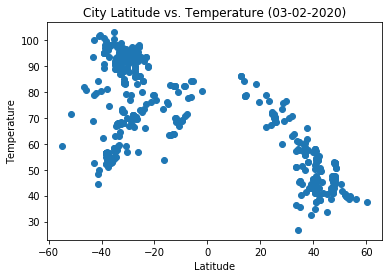

Write a sentence or two explaining what the code is and analyzing.


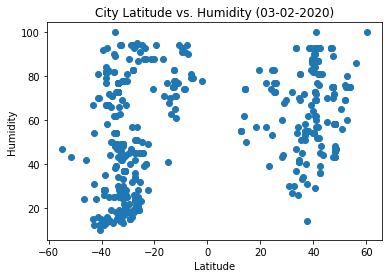

Write a sentence or two explaining what the code is and analyzing.


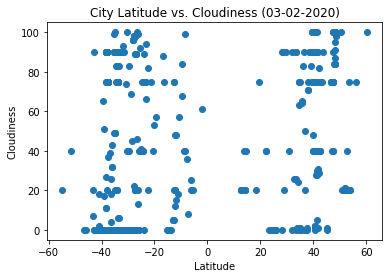

Write a sentence or two explaining what the code is and analyzing.


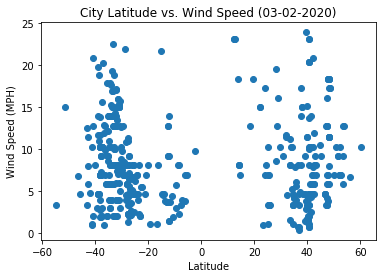

Write a sentence or two explaining what the code is and analyzing.


In [192]:
plt.scatter(x_axis, y_axis_1)
plt.title(f"City Latitude vs. Temperature ({datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.savefig("Images/Temp_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

plt.scatter(x_axis, y_axis_2)
plt.title(f"City Latitude vs. Humidity ({datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("Images/Humid_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

plt.scatter(x_axis, y_axis_3)
plt.title(f"City Latitude vs. Cloudiness ({datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("Images/Cloudiness_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

plt.scatter(x_axis, y_axis_4)
plt.title(f"City Latitude vs. Wind Speed ({datetime.utcfromtimestamp(date).strftime('%m-%d-%Y')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.savefig("Images/Wind_Scatter_Plot")
plt.show()

print(f"Write a sentence or two explaining what the code is and analyzing.")

In [193]:
north = []
south = []
north_index = []
south_index = []
north_temps = []
north_humid = []
north_clouds = []
north_wind = []
south_temps = []
south_humid = []
south_clouds = []
south_wind = []

for value in lat:
    if value > 0:
        north.append(value)
        north_index.append(lat.index(value))
    else:
        south.append(value)
        south_index.append(lat.index(value))

for value in north_index:
    north_temps.append(temp[value])
    north_humid.append(humid[value])
    north_clouds.append(clouds[value])
    north_wind.append(wind[value])

for value in south_index:
    south_temps.append(temp[value])
    south_humid.append(humid[value])
    south_clouds.append(clouds[value])
    south_wind.append(wind[value])

In [194]:
north_dict = {
    "lat": north,
    "temp": north_temps,
    "humidity": north_humid,
    "cloudiness": north_clouds,
    "wind": north_wind
}

south_dict = {
    "lat": south,
    "temp": south_temps,
    "humidity": south_humid,
    "cloudiness": south_clouds,
    "wind": south_wind
}

north_df = pd.DataFrame(north_dict)
south_df = pd.DataFrame(south_dict)

north_x_axis = north_df["lat"]
north_y_1 = north_df["temp"]
north_y_2 = north_df["humidity"]
north_y_3 = north_df["cloudiness"]
north_y_4 = north_df["wind"]

south_x_axis = south_df["lat"]
south_y_1 = south_df["temp"]
south_y_2 = south_df["humidity"]
south_y_3 = south_df["cloudiness"]
south_y_4 = south_df["wind"]

weather_data.to_csv("Weather_Data_Export.csv", index=False, header=True)
north_df.to_csv("Northern_Weather_Data.csv", index=False, header=True)
south_df.to_csv("Southern_Weather_Data.csv", index=False, header=True)

The r-squared is: -0.8024803645553059


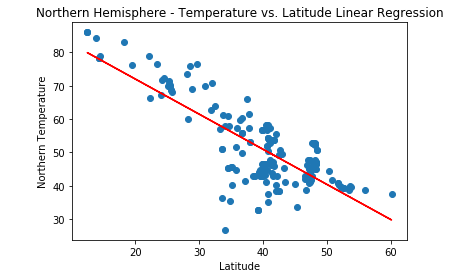

A short analysis
The r-squared is: 0.09011309785012984


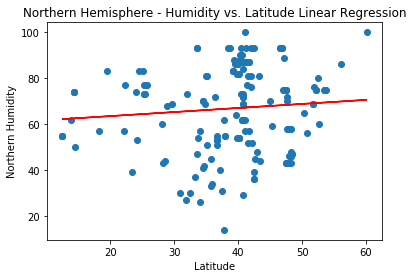

A short analysis
The r-squared is: 0.38991816723865697


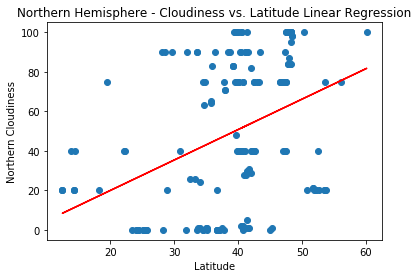

A short analysis
The r-squared is: -0.051361366127714886


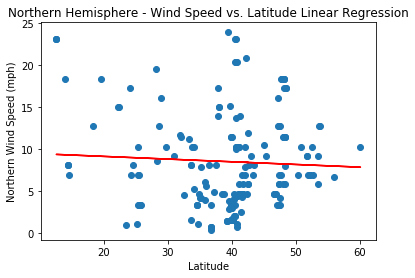

A short analysis
The r-squared is: 0.16932418083829928


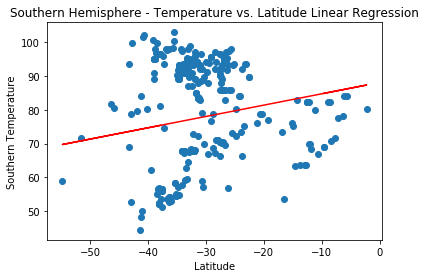

A short analysis
The r-squared is: 0.21781073478406365


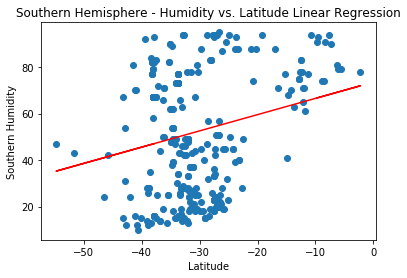

A short analysis
The r-squared is: -0.02321505159257856


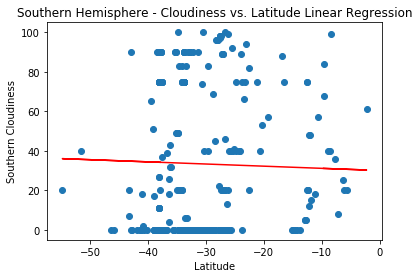

A short analysis
The r-squared is: -0.23868893059162885


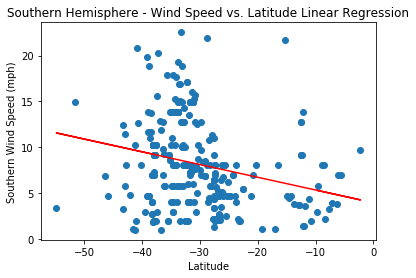

A short analysis


In [196]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_1)
regress_values_1 = north_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_axis, north_y_1)
plt.plot(north_x_axis,regress_values_1, "r-")

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
#Figure out why this isn't working

print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Northern Temperature")
plt.savefig("Images/North_Temp_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_2)
regress_values_1 = north_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_axis, north_y_2)
plt.plot(north_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Northern Humidity")
plt.savefig("Images/North_Humid_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_3)
regress_values_1 = north_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_axis, north_y_3)
plt.plot(north_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Northern Cloudiness")
plt.savefig("Images/North_Clouds_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_x_axis, north_y_4)
regress_values_1 = north_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_x_axis, north_y_4)
plt.plot(north_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Northern Wind Speed (mph)")
plt.savefig("Images/North_Wind_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_1)
regress_values_1 = south_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_axis, south_y_1)
plt.plot(south_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Temperature vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Southern Temperature")
plt.savefig("Images/South_Temp_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_2)
regress_values_1 = south_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_axis, south_y_2)
plt.plot(south_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Southern Humidity")
plt.savefig("Images/South_Humid_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_3)
regress_values_1 = south_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_axis, south_y_3)
plt.plot(south_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Southern Cloudiness")
plt.savefig("Images/South_Clouds_Linear_Regression")
plt.show()

print("A short analysis")

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_x_axis, south_y_4)
regress_values_1 = south_x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_x_axis, south_y_4)
plt.plot(south_x_axis,regress_values_1, "r-")
print(f"The r-squared is: {rvalue}")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Southern Wind Speed (mph)")
plt.savefig("Images/South_Wind_Linear_Regression")
plt.show()

print("A short analysis")